In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import preprocessing
from models.lightGBM import lightGBMs
from models.GridSearch import GridSearchs
import lightgbm as lgb
%matplotlib inline

def pd_city_concat(df):
    count_ = df.groupby('Country').transform('count')
    city_ = df.groupby('City').transform('count')
    df["Country"] = city_['Country']
    return df

def df_preprocess(df):
    # year
    df = pd_city_concat(df)
    # country
    df["pressure_mean"] = df["pressure_max"]-df["pressure_min"] 
    df["pressure_cnt"] = df["pressure_cnt"]-df["pressure_mid"]
    df = df.drop(drop_list, axis=1)
    #df.replace([np.inf, -np.inf], np.nan, inplace=True)
    df = df.fillna(0)
    return df


drop_list=["id", "year", "month", "day", "City", 
           'pressure_min', 'pressure_max', "pressure_cnt", "pressure_var", "humidity_var",
           "pressure_mid", "dew_var", "dew_cnt"]
           #"temperature_cnt", "humidity_cnt", "ws_cnt", "dew_cnt", ,
           #'co_cnt', 'o3_cnt', 'so2_cnt', 'no2_cnt',
           #'so2_min', 'so2_max'
           #'ws_min', 'ws_max', 'dew_min', 'dew_max', "humidity_min", 'humidity_max', 
    #'temperature_min', 'temperature_max', 'o3_min', 'o3_max', 'no2_min', 'no2_max'

target_name = 'pm25_mid'
df = pd.read_csv('/Users/hagi/downloads/place/train.csv')
df = df_preprocess(df)
#df.sort_values(by = 'data', ascending = True, inplace = True) 
df.head()

,Country,lat,lon,co_cnt,co_min,co_mid,co_max,co_var,o3_cnt,o3_min,...,ws_cnt,ws_min,ws_mid,ws_max,ws_var,dew_min,dew_mid,dew_max,pm25_mid,pressure_mean
0,1009,-27.46794,153.02809,38,0.749,2.590,2.633,0.850,29,2.397,...,42,0.241,1.088,3.101,1.983,7.671,10.358,15.112,19.901,19.261
1,1057,-12.46113,130.84185,47,2.594,3.181,4.828,1.208,49,3.092,...,48,0.828,3.473,7.396,10.411,21.324,23.813,24.221,13.741,141.915
2,1038,-37.81400,144.96332,17,1.190,1.197,2.200,0.248,123,0.736,...,125,0.000,2.107,8.089,15.719,10.309,13.133,15.422,25.918,138.200
3,717,-32.92953,151.78010,63,4.586,11.044,14.802,24.186,90,1.917,...,52,0.284,0.503,3.592,2.485,7.146,10.685,13.344,174.370,6.661
4,964,-31.95224,115.86140,47,4.689,8.681,11.100,10.011,83,0.349,...,102,0.500,0.755,3.396,1.937,1.091,3.277,12.272,167.063,8.090


In [2]:
#N = int(len(df)*0.08)
X = df.drop([target_name], axis=1).values
y = df[target_name]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=40)
print(X_train.shape, y_train.shape)

(156752, 41) (156752,)


In [ ]:
# lightGBM model
bst = lgb.LGBMRegressor(num_leaves = 40,
                        learning_rate=0.01,
                        min_child_samples=10,
                        n_estimators=2000,
                        max_depth=32)

print("GridSearch: Serach Best parameter")
gs = GridSearchs(bst, X_train, X_test, y_train, y_test)
gs.main()

print("Best parameter: {'learning_rate': 0.05, 'max_depth': 8, 'n_estimators': 2000, 'num_leaves': 31}")
print("GridSearchCV RMSE:19.49347134924246") 

In [ ]:
bst = lgb.LGBMRegressor(num_leaves = 31,
                        learning_rate=0.01,
                        min_child_samples=10,
                        n_estimators=2000,
                        max_depth=8)

print("GridSearch: Serach Best parameter")
gs = GridSearchs(bst, X_train, X_test, y_train, y_test)
gs.main()

print("Best parameter: {'learning_rate': 0.05, 'max_depth': 8, 'n_estimators': 2000, 'num_leaves': 31}")
print("GridSearchCV RMSE:19.49347134924246") 

In [60]:
print("lightGBM train and predict")
bst = lgb.LGBMRegressor(num_leaves = 31,
                        learning_rate=0.05,
                        min_child_samples=10,
                        n_estimators=2000,
                        max_depth=16)

gbm = lightGBMs(bst, X_train, X_test, y_train, y_test)
bst_model = gbm.train()
# default RMSE:19.49347134924246

lightGBM train and predict


/Users/hagi/opt/anaconda3/envs/yolo/lib/python3.8/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/hagi/opt/anaconda3/envs/yolo/lib/python3.8/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


default RMSE:19.746392622046717


feature importance


,importance
co_mid,2467
no2_mid,2144
lon,2127
no2_min,2122
lat,1903
o3_mid,1847
co_min,1792
so2_mid,1706
pressure_mean,1591
Country,1549


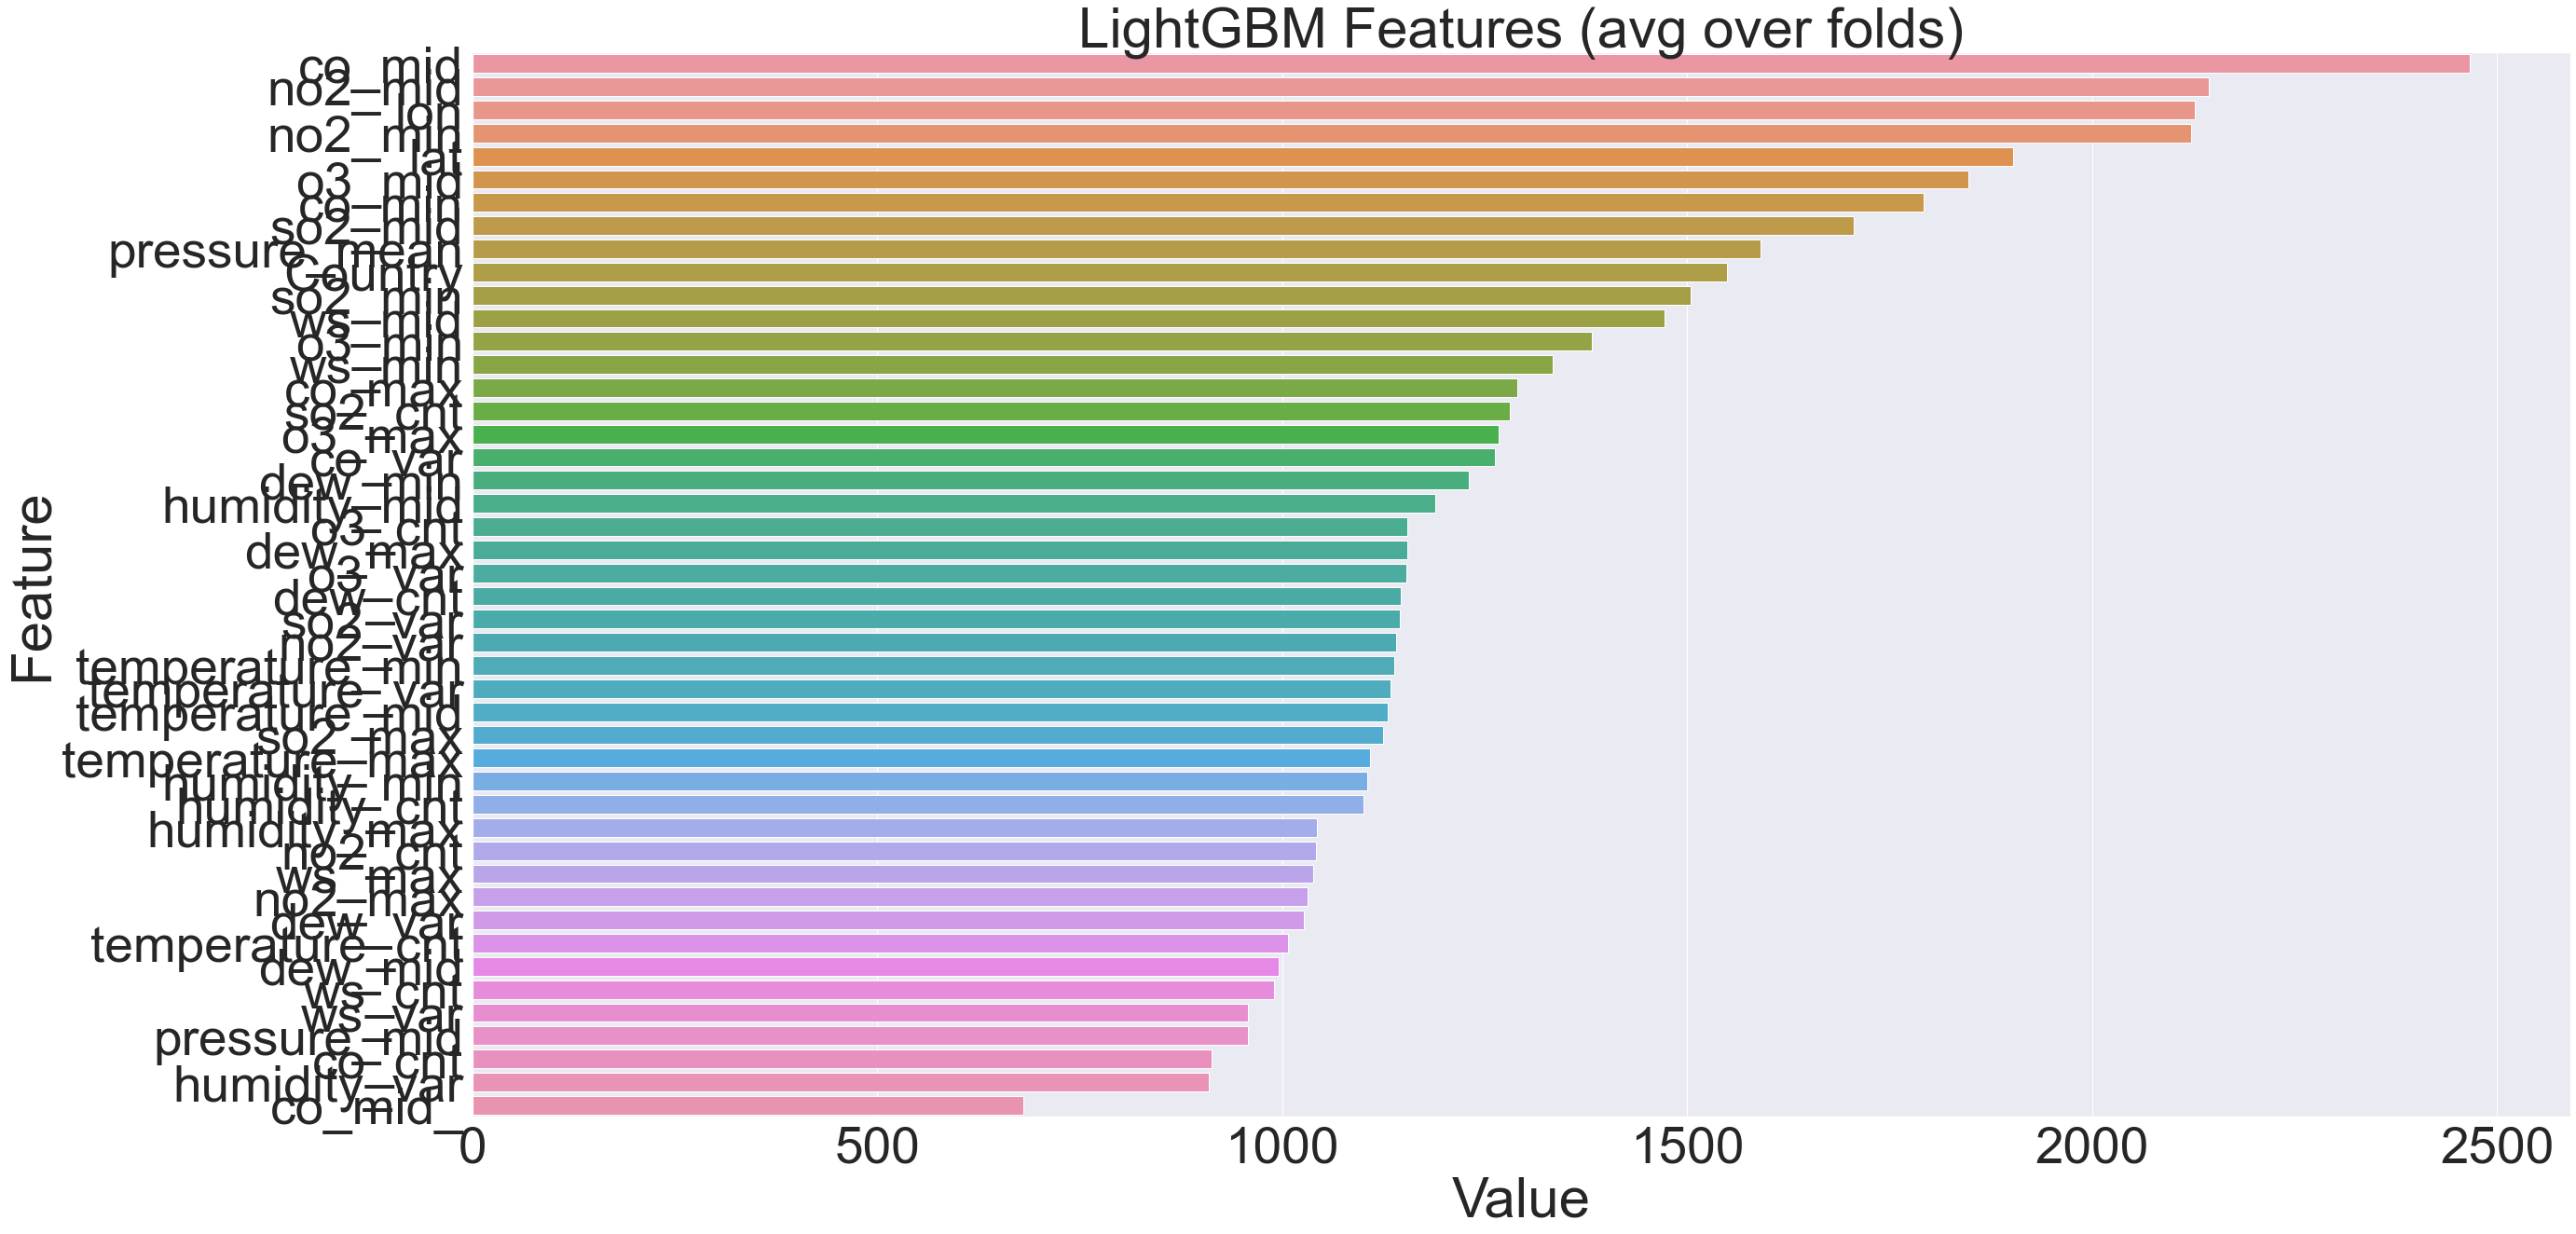

In [61]:
print("feature importance")
colum = df.drop([target_name], axis=1).columns
gbm.plotImp(bst_model, colum, save_name='gs_feature_imp.png', on_display=True)

In [64]:
X_test = pd.read_csv('/Users/hagi/downloads/place/test.csv')
X_test = df_preprocess(X_test)
#X_test = X_test.drop(drop_list, axis=1)
y_pred = bst_model.predict(X_test)
print(y_pred.shape)

(53509,)


In [65]:
dd = pd.DataFrame(y_pred)
dd.set_index(dd.index+195942).to_csv("submit1.csv", header=False)